In [146]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re
from google.colab import drive
import warnings
warnings.filterwarnings('ignore') 


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Diabetesdata /diabetes.csv')


In [149]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       153 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [150]:
print(diabetes_data.shape)

(153, 1)


In [151]:
diabetes_data.mean()

0    0.346405
dtype: float64

In [152]:
diabetes_data.isnull().sum()

0    0
dtype: int64

In [153]:
diabetes_data.min()

0    0
dtype: int64

In [154]:
#df = df.drop('Outcome',axis=1)
#X = diabetes_data.drop("Outcome",axis = 1)
#y = diabetes_data.Outcome

In [155]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff24a4a1450>,
      dtype=object)

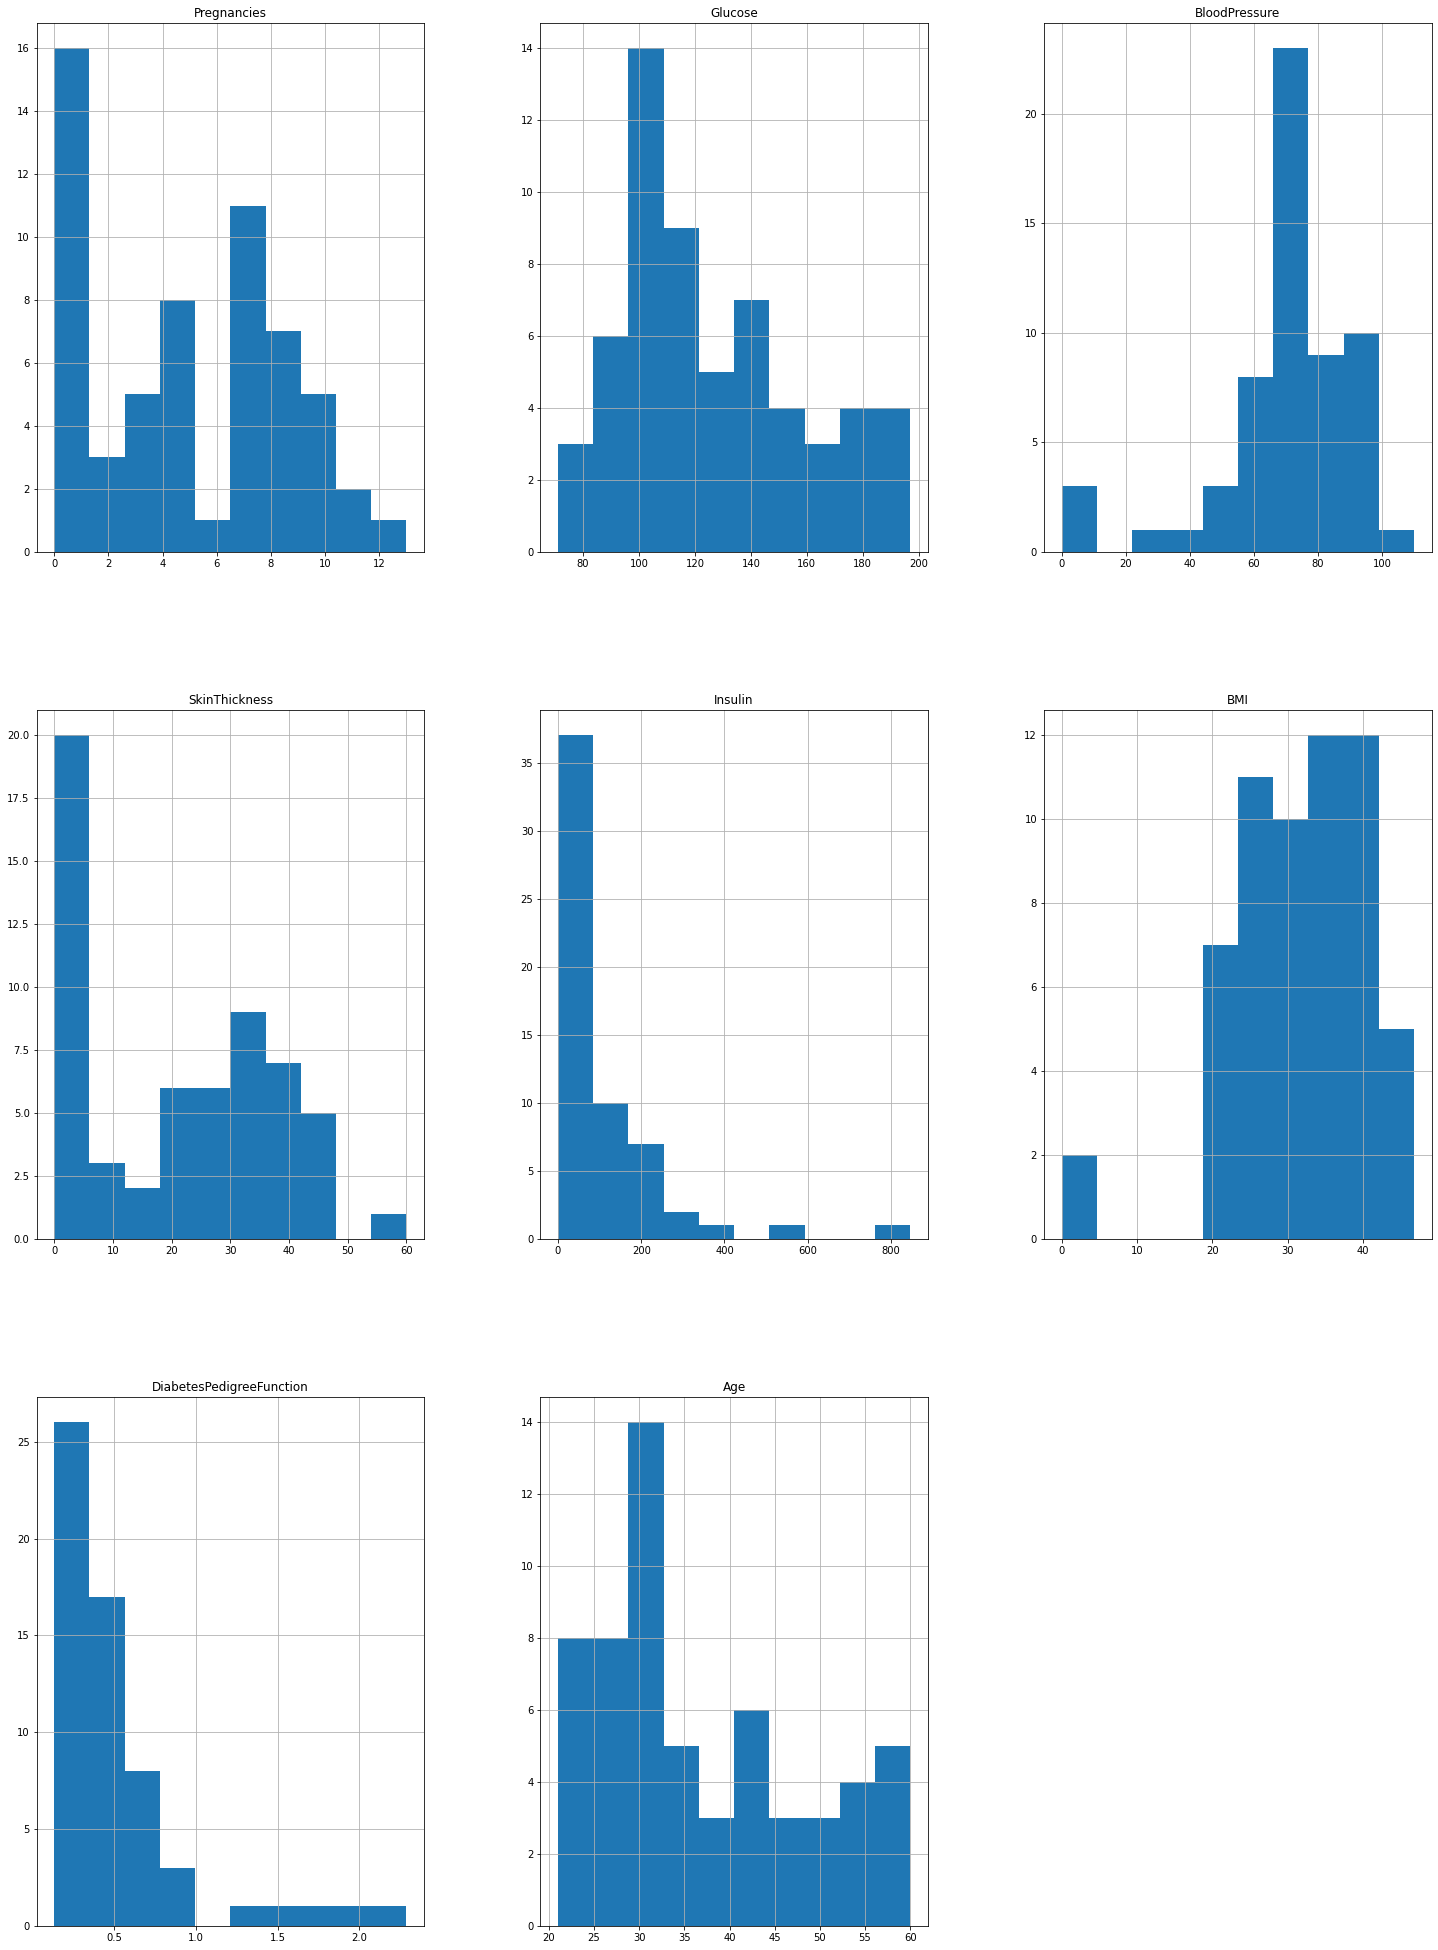

In [191]:
df.iloc[1:60].hist(xlabelsize=10,ylabelsize=10,figsize=(25,35))

In [157]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [193]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
  print(train_index, test_index)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23] [10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23] [15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23]


In [158]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.753


In [161]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.766


In [162]:
y_pred = dt.predict(X_test)


In [163]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[83 16]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [164]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

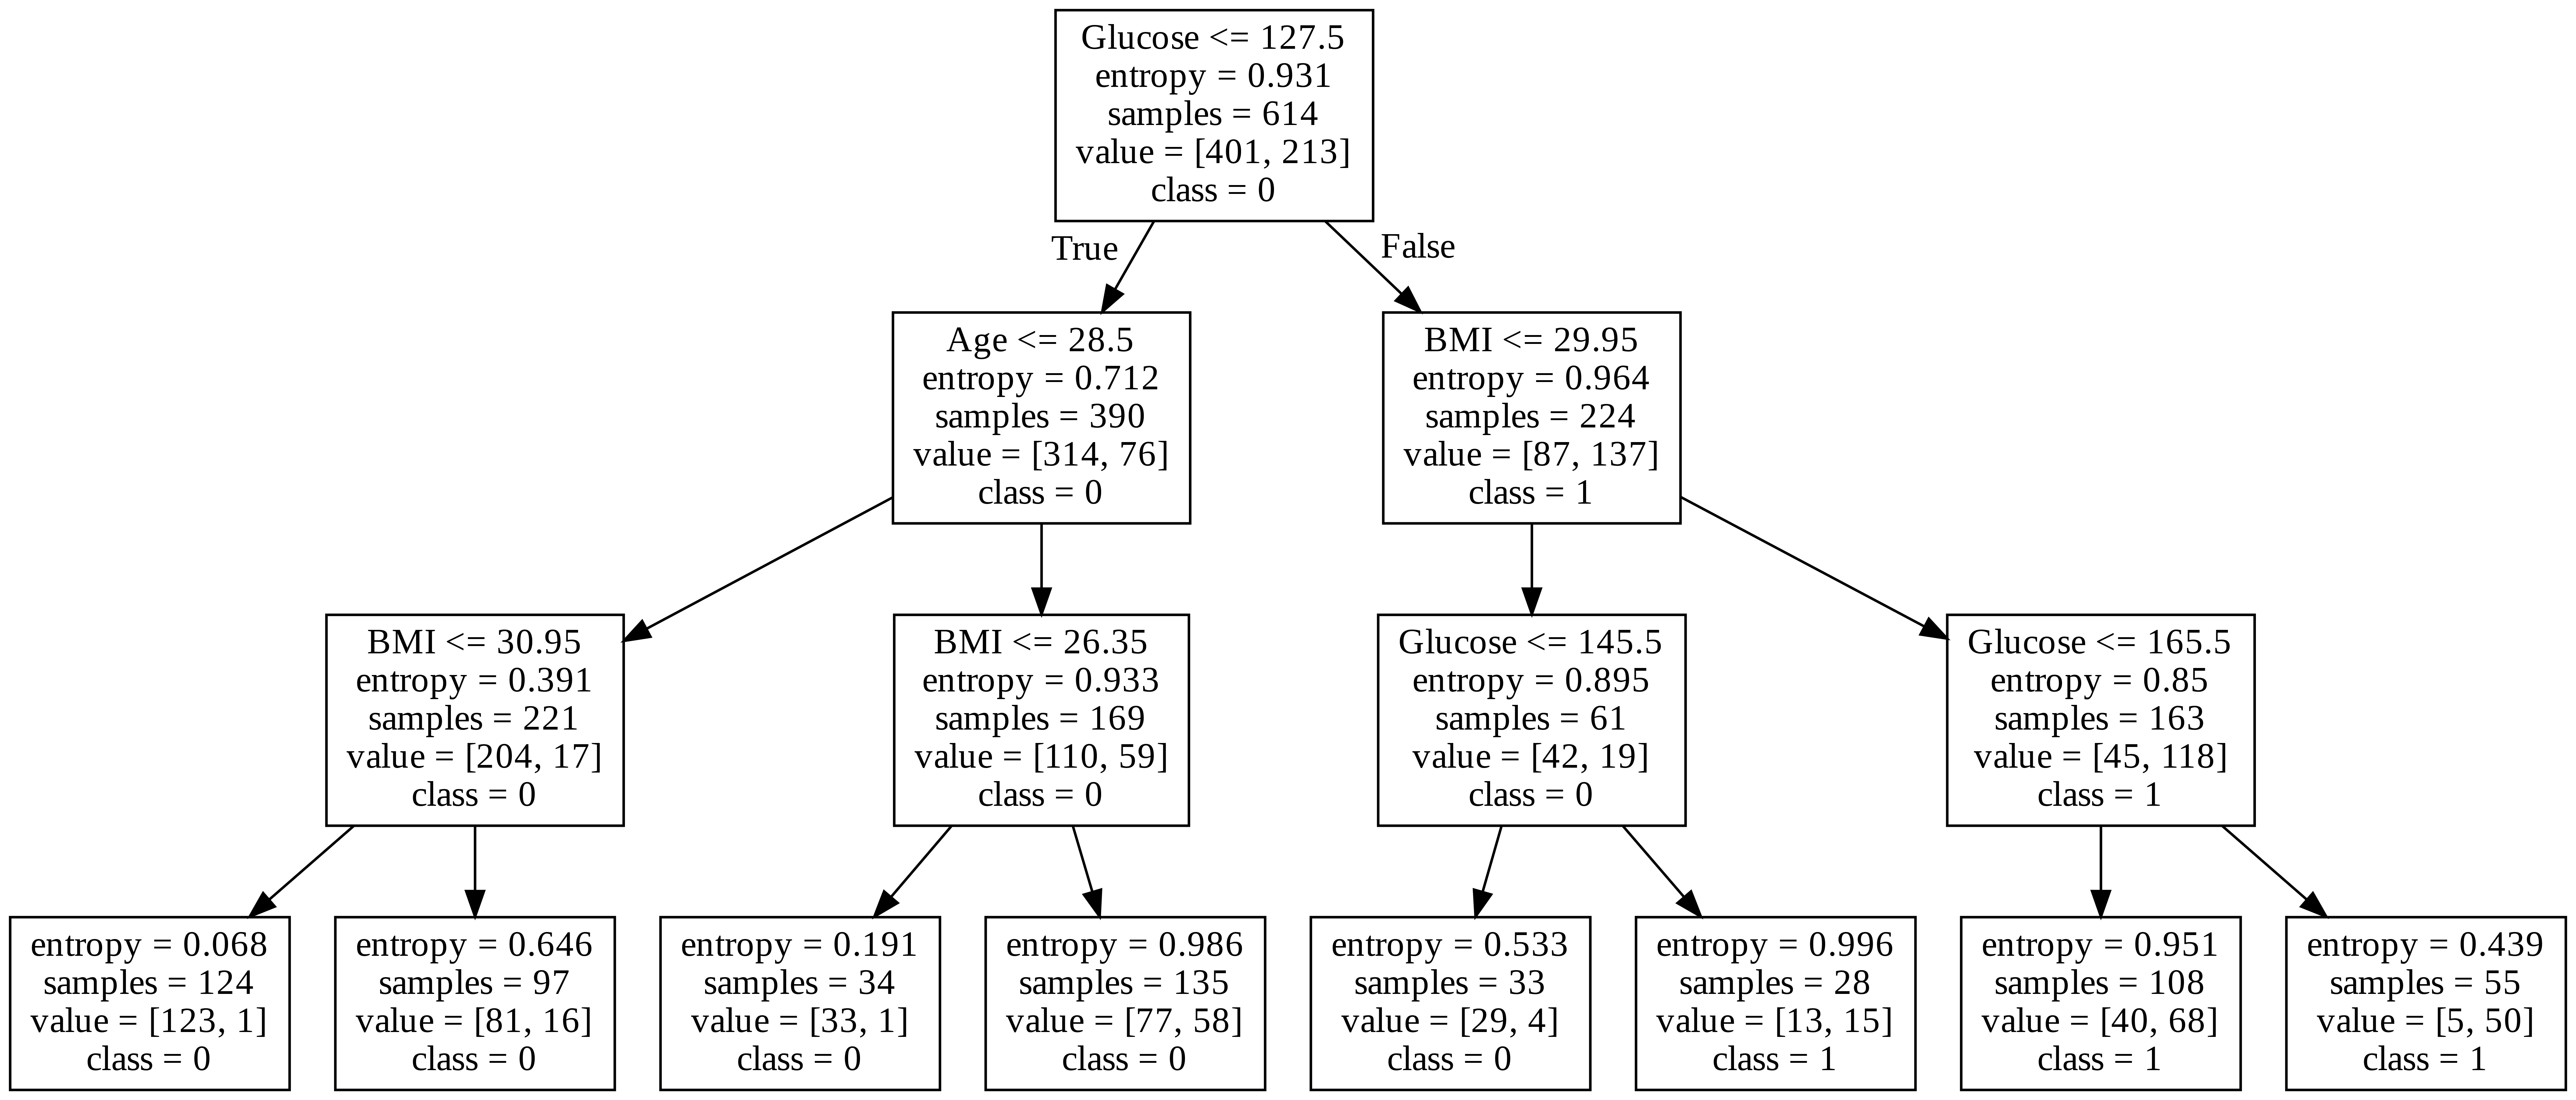

In [165]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


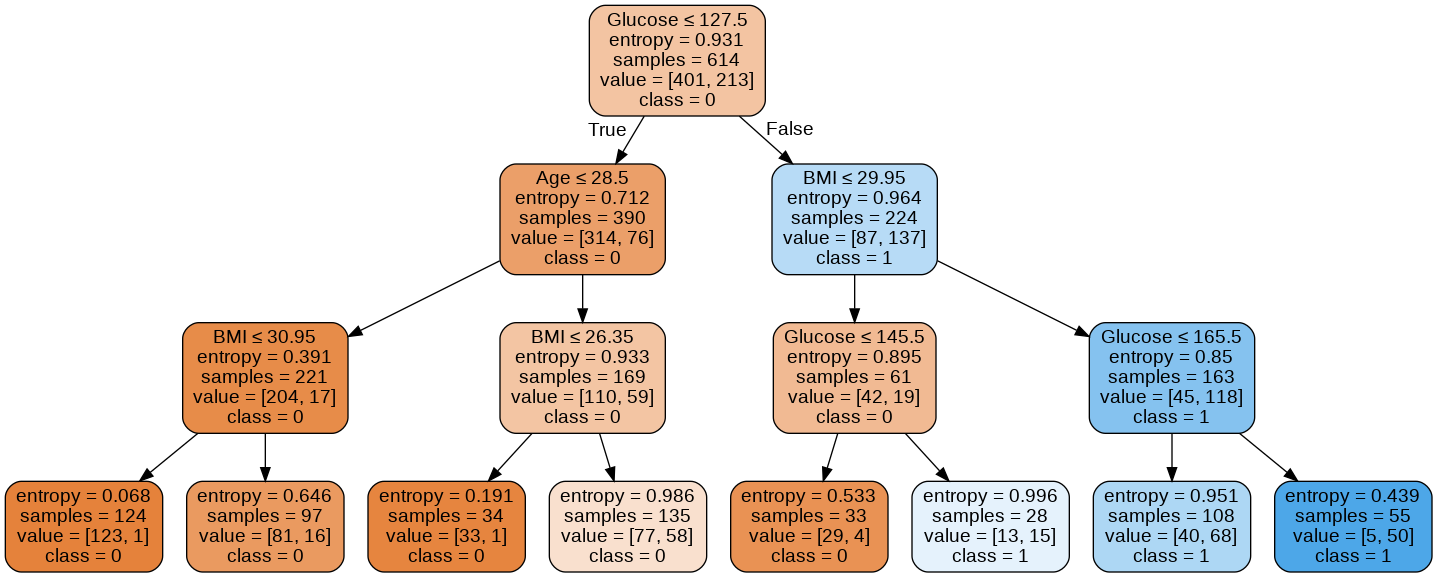

In [166]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [167]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [168]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 5)
def models(X_train, y_train,scoring, cv):
 from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.753


In [169]:
#Plot ROC chart for DT.Write your code below.
cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
print ('\nROC: \n')
models(X_train, y_train, 'roc_auc', cv)



ROC: 



In [170]:
#Adjust the decision tree parameters to improve the performance.Write your code below.



In [171]:
from sklearn.ensemble import ExtraTreesClassifier

In [172]:
model = ExtraTreesClassifier()

In [173]:
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [174]:
#find out the feature importance from the decision tree built above. Write your code below.
model.feature_importances_


array([0.11154092, 0.23403781, 0.09925381, 0.08045903, 0.07265848,
       0.14222381, 0.11684395, 0.14298218])

# NN

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.35294118, 0.49246231, 0.47540984, ..., 0.50670641, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.6147541 , ..., 0.53204173, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.52459016, ..., 0.45901639, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.47738693, 0.59016393, ..., 0.54843517, 0.17378309,
        0.6       ],
       [0.11764706, 0.73366834, 0.57377049, ..., 0.41728763, 0.11058924,
        0.13333333],
       [0.47058824, 0.3718593 , 0.57377049, ..., 0.52608048, 0.2677199 ,
        0.3       ]])

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [177]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.72427329
Iteration 2, loss = 0.71657053
Iteration 3, loss = 0.70994609
Iteration 4, loss = 0.70366430
Iteration 5, loss = 0.69812640
Iteration 6, loss = 0.69313341
Iteration 7, loss = 0.68826557
Iteration 8, loss = 0.68327959
Iteration 9, loss = 0.67861303
Iteration 10, loss = 0.67366090
Iteration 11, loss = 0.66922238
Iteration 12, loss = 0.66471646
Iteration 13, loss = 0.66041308
Iteration 14, loss = 0.65625504
Iteration 15, loss = 0.65217646
Iteration 16, loss = 0.64841338
Iteration 17, loss = 0.64431100
Iteration 18, loss = 0.64013523
Iteration 19, loss = 0.63616819
Iteration 20, loss = 0.63217986
Iteration 21, loss = 0.62806126
Iteration 22, loss = 0.62427815
Iteration 23, loss = 0.62063792
Iteration 24, loss = 0.61708681
Iteration 25, loss = 0.61335659
Iteration 26, loss = 0.60945832
Iteration 27, loss = 0.60573070
Iteration 28, loss = 0.60182043
Iteration 29, loss = 0.59803181
Iteration 30, loss = 0.59414659
Iteration 31, loss = 0.59006487
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [178]:
import sklearn.metrics as metrics
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.7467532467532467
[[80 19]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [179]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.747


In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

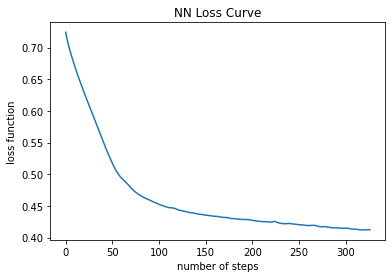

In [181]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [182]:
#check out weights

In [183]:
(mlp.intercepts_[0]).shape

(10,)

In [184]:
(mlp.coefs_[0]).shape

(8, 10)

In [185]:
mlp.intercepts_[0]

array([-0.05897817,  0.01616119, -0.04911316, -0.45562926,  0.09249891,
        0.71542581, -0.02359722,  0.68992078,  0.11678651,  0.55562326])

In [186]:
mlp.coefs_[0]

array([[-0.33808743,  0.80128969,  0.33012552, -0.42146947,  0.13040216,
         0.07858161,  0.5124563 , -0.07110998, -0.07524634, -0.07674065],
       [-0.29634415, -0.52386873, -0.34416302,  0.10264232, -0.16222856,
         0.29276484,  0.18088233,  0.8067042 , -0.31048488, -0.78211169],
       [ 0.07876383,  0.36600007, -0.35249598,  0.20828765,  0.03386245,
         0.54120205, -0.31332842, -0.19898063, -0.29705049, -0.04387699],
       [ 0.13363179,  0.3191817 ,  0.28247814, -0.05377422, -0.01671907,
        -0.08037113, -0.47222217,  0.21573855,  0.10217428,  0.04217647],
       [-0.00241537, -0.01291473, -0.08530242,  0.27136724, -0.52243094,
        -0.62555166,  0.38827138, -0.46389611, -0.01717456,  0.42553549],
       [-0.20599311,  0.04343977, -0.32370456,  0.23543407, -0.87753298,
         0.01171376,  0.49836143,  0.41104542, -0.05245454,  0.03607155],
       [-0.01066329, -0.29479584, -0.61000274,  0.39594592,  0.143504  ,
        -0.29342771, -0.50392101,  0.28873442

# SVM

In [187]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.7337662337662337
[[83 16]
 [25 30]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        99
           1       0.65      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

r= 0.1 C= 10
Accuracy= 0.7077922077922078
[[78 21]
 [24 31]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154

r= 1 C= 1
Accuracy= 0.6623376623376623
[[87 12]
 [40 15]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        99
           1       0.56      0.27      0.37        55

   

# deployment 

In [188]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0]


In [189]:
#score the model on a scoring data set

#diabetes_score_data = pd.read_csv('.....csv')

#sc_X = StandardScaler()
#X =  sc_X.fit_transform(diabetes_score_data)

#pred = loaded_model.predict(X)
#print(pred)



In [190]:
np.savetxt("/content/drive/MyDrive/Diabetesdata /diabetes.csv", pred, fmt="%d", delimiter=",")